In [1]:
import cv2
import glob
import os
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image



In [2]:
cornell_dir = "/home/vladushked/Downloads/cornell"

In [3]:
rgbs = glob.glob(os.path.join(cornell_dir, "pcd????r.png"))
depths = glob.glob(os.path.join(cornell_dir, "pcd????d.tiff"))
negs = glob.glob(os.path.join(cornell_dir, "pcd????cneg.txt"))
poss = glob.glob(os.path.join(cornell_dir, "pcd????cpos.txt"))


In [4]:
rgbs.sort()
depths.sort()
negs.sort()
poss.sort()


/home/vladushked/Downloads/cornell/pcd0100r.png
(480, 640, 3)


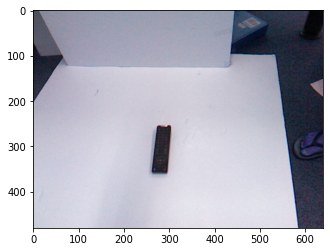

In [5]:
print(rgbs[0])
rgb = cv2.imread(rgbs[0])
print(rgb.shape)
imshow(rgb)

In [6]:
neg_points = np.genfromtxt(negs[0], dtype="float")
neg_points = neg_points.reshape(neg_points.shape[0] // 4, 4, 2).astype(int)
pos_points = np.genfromtxt(poss[0], dtype="float")
pos_points = pos_points.reshape(pos_points.shape[0] // 4, 4, 2).astype(int)

In [7]:
pos_points.shape

(4, 4, 2)

(4, 2)
(4, 2)
(4, 2)


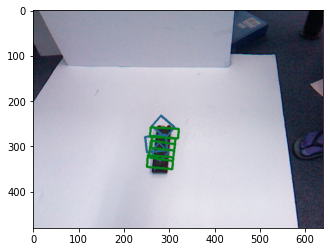

In [8]:
rgb = cv2.imread(rgbs[0])
color = list(np.random.random(size=3) * 256)
for rect in neg_points:   
    print(rect.shape) 
    cv2.drawContours(rgb, [rect], 0, color=color, thickness=4)
color = list(np.random.random(size=3) * 256)
for rect in pos_points:
    cv2.drawContours(rgb, [rect], 0, color=color, thickness=4)

imshow(rgb)

In [19]:
im = Image.open(depths[0])
# im.show()
imarray = np.array(im)
imarray.shape

(480, 640)

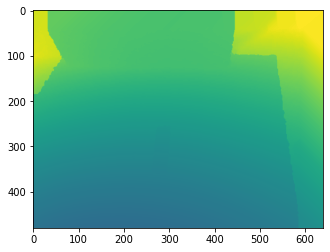

In [24]:
imshow(imarray)

In [25]:
cv2.imwrite("df.tiff", imarray)

True

In [21]:
int(os.path.split(rgbs[-1])[-1].split("pcd")[-1].split("r.png")[0])

199

In [27]:
pos_points.reshape(-1, 2)

array([[253, 319],
       [309, 324],
       [307, 350],
       [251, 345],
       [255, 324],
       [308, 332],
       [313, 295],
       [260, 287],
       [260, 303],
       [311, 309],
       [314, 283],
       [263, 277],
       [258, 279],
       [320, 282],
       [321, 261],
       [259, 258]])

In [26]:
pos_points.reshape(-1, 2) + [1, 2]

array([[254, 321],
       [310, 326],
       [308, 352],
       [252, 347],
       [256, 326],
       [309, 334],
       [314, 297],
       [261, 289],
       [261, 305],
       [312, 311],
       [315, 285],
       [264, 279],
       [259, 281],
       [321, 284],
       [322, 263],
       [260, 260]])